<a href="https://www.kaggle.com/code/akhilnaik2019/linear-regression-basics?scriptVersionId=146794133" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Modelling with Linear Regression in Python

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Basic data manipulation in Python

### Loading data
For most analyses, the first step involves importing a data set into python. We can use the `read_csv()` function from the `pandas` library to import CSV files.

* Import `Auto.csv` data set:

In [2]:
Auto = pd.read_csv('https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/Auto.csv')

To view the data, we can either print the entire dataset by typing its name, or we can just look at the first few rows with the `head()` function.

In [3]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Now that we have the data, we can begin to learn things about it. For example, if we want to know how many rows and columns the DataFrame contains:

In [4]:
Auto.shape

(392, 9)

This tells us that the data has 392 observations, or rows, and nine variables, or columns.

The `.dtypes`  atribute tells us that most of the variables are numeric or integer, although the `name`  variable is a character vector.

In [5]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

### Summary statistics
Often, we want to know some basic things about variables in our data. Calling the `describe()` method on a DataFrame will give you an idea of some of the distributions of your variables.

The `describe()` function produces a numerical summary of each (quantitative) variable in a particular data set.

In [6]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
Auto['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

The summary suggests that `origin` might be better thought of as categorical. It only seems to have three possible values, 1, 2 and 3. If we read the documentation about the data we will learn that these numbers correspond to where the car is from: 1. American, 2. European, 3. Japanese. So let's cast that variable into a categorical variable using using the `astype()` function.

In [8]:
Auto["origin"] = Auto["origin"].astype('category')

If we want to include a summary of this variable when we call `.describe()`, we need to let python know we want ALL the variables (not just the quantitative ones):

In [9]:
Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.0,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.0,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,NaN,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,NaN,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,NaN,NaN


Or, just look at one particular statistic using `mean()`, `std()`, `median()`, and more using the `numpy` library:

In [10]:
np.mean(Auto['displacement'])

194.41198979591837

### Plotting
The `matlibplot` module is the standard one to produce simple graphics. For instance, we can quickly produce a scatter plot like this:

Text(0, 0.5, 'mpg')

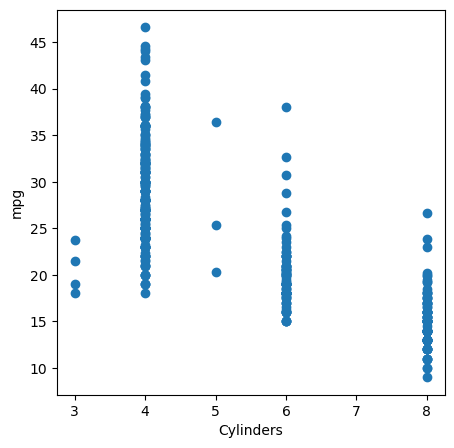

In [11]:
plt.figure(figsize=(5,5))
#sns.scatterplot(x = Auto['cylinders'], y = Auto['mpg'])
plt.scatter(Auto['cylinders'],Auto['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('mpg')

We can produce an *improved* visualisation by using *boxplots*. To this, we could use the *seaborn* module which is embedded into the `matplotlib` but it is more powerful, particularly when working with dataframes.

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

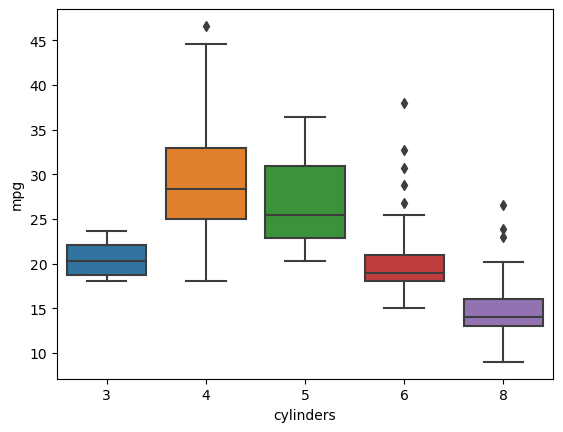

In [13]:
sns.boxplot(x=Auto['cylinders'], y=Auto['mpg'])

For small datasets, we might want to see all the bivariate relationships between the variables. The `pandas` module has a `scatter_matrix()` function that can do just that. (Be patient-- it takes a long time!)

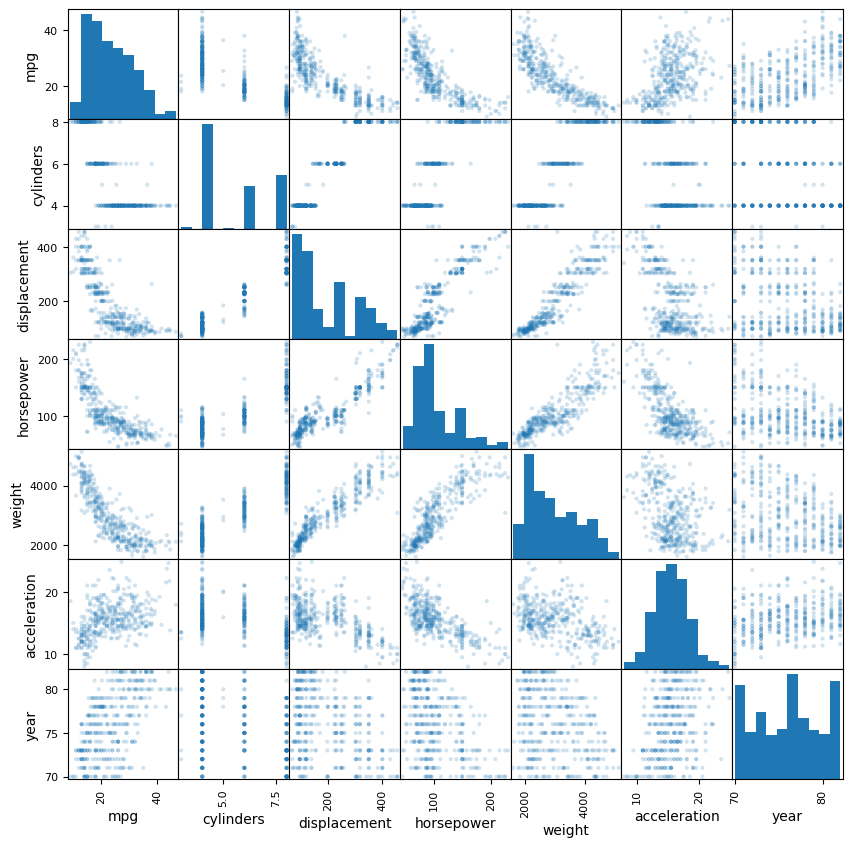

In [14]:
pd.plotting.scatter_matrix(Auto, alpha=0.2, figsize=(10, 10))
plt.show()

Staying with *seaborn*, the function `distplot()` is used to make histograms (and density plots):

<AxesSubplot:xlabel='mpg', ylabel='Density'>

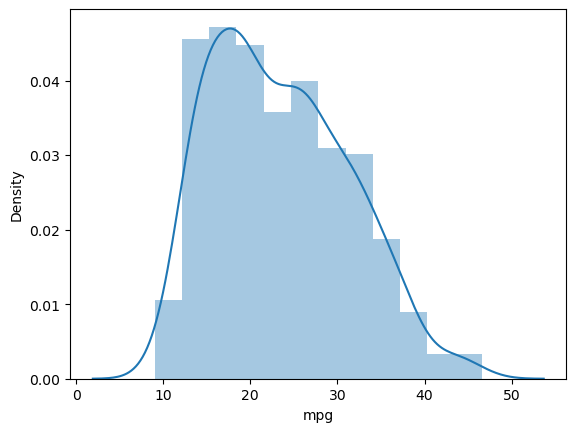

In [15]:
sns.distplot(Auto['mpg'])

Sometimes, we might want to save a plot for use outside of our Jupyter notebook. To do this, we call the plot's `savefig()` function. Note that `savefig()` saves the function that is registered with `pylplot` so in *Jupyter*, it must either be called within the same cell as it is plotted or be assigned to a *figure* object.

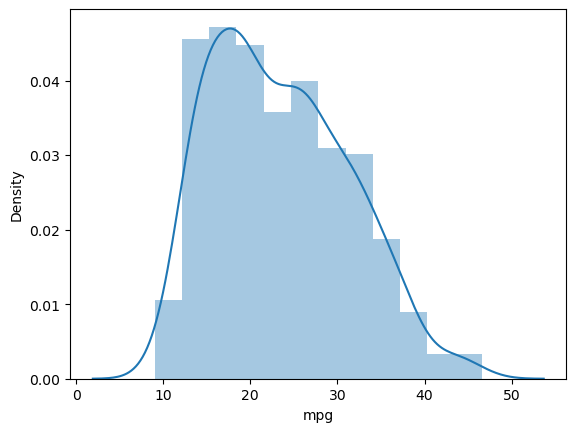

In [16]:
fig = plt.figure()
ax = sns.distplot(Auto['mpg'])

In [17]:
fig.savefig('histogram.png')

## Regression

### Dataset
We will use the *Hitters* dataset which records the Major League Baseball Data from the 1986 and 1987 seasons and is widely available from public repositories. The dataset is available in the module's GitHub repository: https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/Hitters.csv

The data frame contains 322 observations of major league players on the following 20 variables:

* AtBat - Number of times at bat in 1986
* Hits - Number of hits in 1986
* HmRun - Number of home runs in 1986
* Runs - Number of runs in 1986
* RBI - Number of runs batted in in 1986
* Walks - Number of walks in 1986
* Years - Number of years in the major leagues
* CAtBat - Number of times at bat during his career
* CHits - Number of hits during his career
* CHmRun - Number of home runs during his career
* CRuns - Number of runs during his career
* CRBI - Number of runs batted in during his career
* CWalks - Number of walks during his career
* League - A factor with levels A and N indicating player's league at the end of 1986
* Division - A factor with levels E and W indicating player's division at the end of 1986
* PutOuts - Number of put outs in 1986
* Assists - Number of assists in 1986
* Errors - Number of errors in 1986
* Salary - 1987 annual salary on opening day in thousands of dollars
* NewLeague - A factor with levels A and N indicating player's league at the beginning of 1987
  
### Exercise 1
Perform the following exploratory data analysis tasks:
1. Load the data into a dataframe
2. Get the number of rows and columns
3. Get a summary of the data using the `describe()` function
4. Drop the rows with missing values using the `dropna()` function
5. Plot the distribution of the `Salary` variable using a histogram
6. Plot a pairplot of the variables using the `pandas` module. Identify the variables that seem to be correlated with `Salary`.
7. Use the function `get_dummies()` from the `pandas` module to convert the categorical variables into dummy variables.

### Solution

Before proceeding, let's read the `Hitters` data and do some basic preprocessing on it such removing missing values:


In [18]:
# 1. Load the data into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/Hitters.csv', index_col=0)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [19]:
# 2. Get the number of rows and columns
df.shape


(322, 20)

In [20]:
# 3. Get a summary of the data using the `describe()` function
df.describe()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [21]:
# 4. Drop the rows with missing values using the `dropna()` function
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 

<AxesSubplot:>

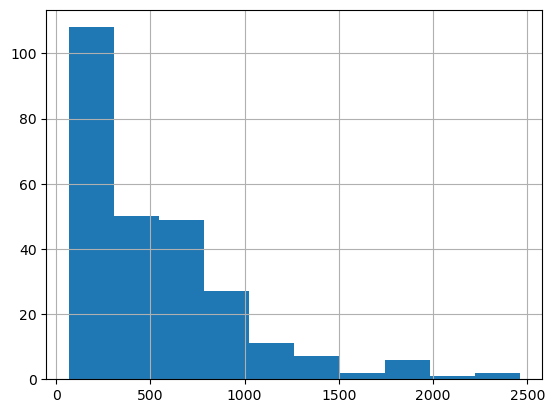

In [22]:
# 5. Plot the distribution of the `Salary` variable using a histogram
df['Salary'].hist()

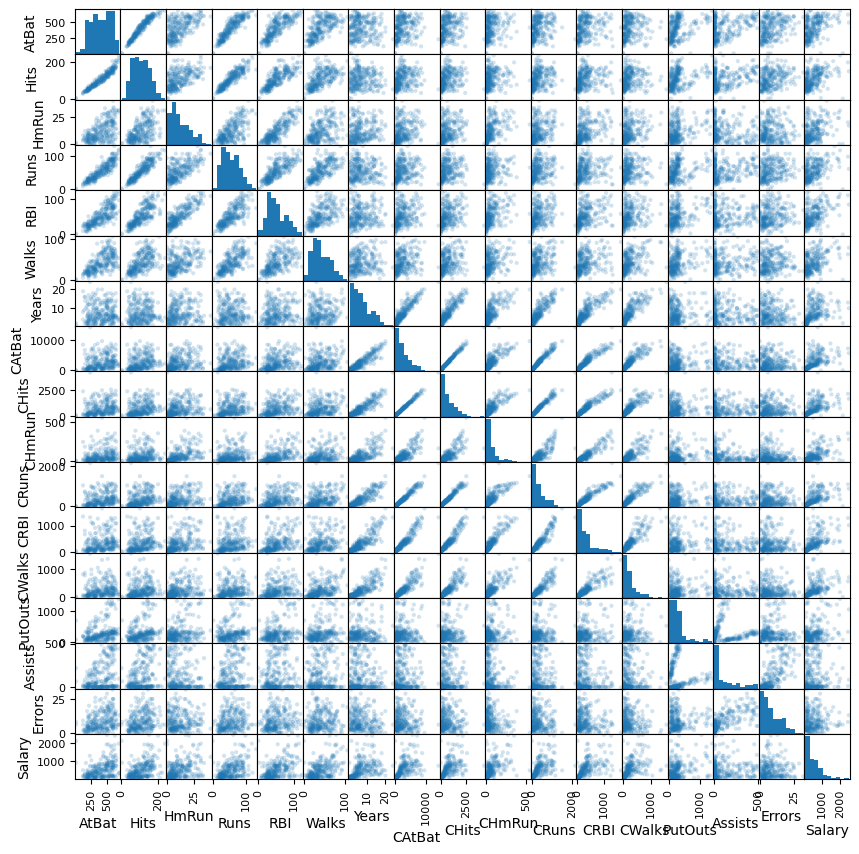

In [23]:
# 6. Plot a pairplot of the variables using the `pandas` module
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

In [24]:
# 7. Use the function `get_dummies()` from the `pandas` module to convert the categorical variables into dummy variables.
df = pd.get_dummies(df, drop_first=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


### `sklearn` package
We will use *scikit-learn* (https://scikit-learn.org/stable/) to implement the regression models.

Let's import few `sklearn` functions that we will use for this section:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Multiple linear regression
The `LinearRegression()` function is used to create the multivariate linear model object:

In [26]:
lin_mdl = LinearRegression()

Let's now create the inputs and output variables for the regression model:

In [27]:
X = df.drop('Salary', axis=1) # features
y = df['Salary'] # target

We now split the samples into a training set and a test set in order
to estimate the test error of the regression models (this one and the ridge and lasso ones that will be created below):

In [28]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1) # 70% training and 30% test

Next we fit a regression model on the training set:

In [29]:
lin_mdl.fit(X_train, y_train)             # Fit a ridge regression on the training data

LinearRegression()

Predict the output of the test set:

In [30]:
y_pred = lin_mdl.predict(X_test)          # Use this model to predict the test data

And, finally evaluate its MSE on the test set:

In [31]:
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

Mean squared error:  121857.38259110495


We can also get the model coefficients (or $\beta$ values) using the `coef_` attribute:

In [32]:

print(pd.Series(lin_mdl.coef_, index = X.columns)) # Print coefficients

AtBat           -2.880952
Hits            14.367050
HmRun            3.642843
Runs           -11.655864
RBI              1.720868
Walks            8.006530
Years           16.896263
CAtBat          -0.297997
CHits            0.184547
CHmRun           0.087305
CRuns            2.275269
CRBI             0.324161
CWalks          -0.779424
PutOuts          0.327820
Assists          0.258472
Errors          -4.508901
League_N        70.665429
Division_W    -167.401606
NewLeague_N    -32.737440
dtype: float64
